Go Cost: $0.00005
Python Cost: $0.00113
Python é 24.38965 maior


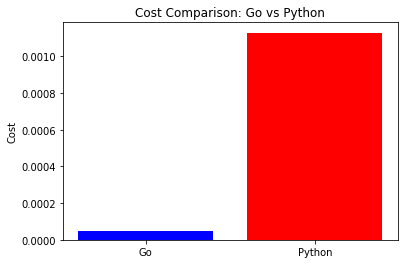

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def load_metrics(file_path):
    return pd.read_csv(file_path)

def analyze_data(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    total_time_seconds = (df['timestamp'].iloc[-1] - df['timestamp'].iloc[0]).total_seconds()
    avg_memory_gb = df['mem_usage'].mean() / 1024  # Convertendo MiB para GiB
    avg_cpu_usage = df['cpu_usage'].mean()
    return total_time_seconds, avg_memory_gb, avg_cpu_usage

def calculate_cost(total_time_seconds, avg_memory_gb, avg_cpu_usage, num_invocations, memoria_mb=128, vcpu=0.083,
                   preco_100ms_nivel1=0.000000231):
    total_100ms_blocks = total_time_seconds / 0.1
    
    adjusted_cpu_factor = (avg_cpu_usage / 100) / vcpu 
    memory_cost = avg_memory_gb * total_100ms_blocks * preco_100ms_nivel1 * adjusted_cpu_factor
    
    total_cost = memory_cost
    return total_cost

def main():

    golang_file = 'container_metrics_golang_scraping.csv'
    python_file = 'container_metrics_python_scraping.csv'
    
    golang_metrics = load_metrics(golang_file)
    python_metrics = load_metrics(python_file)
    
    go_time, go_mem, go_cpu = analyze_data(golang_metrics)
    py_time, py_mem, py_cpu = analyze_data(python_metrics)
    
    go_cost = calculate_cost(go_time, go_mem, go_cpu, len(golang_metrics['container_id'].unique()))
    py_cost = calculate_cost(py_time, py_mem, py_cpu, len(python_metrics['container_id'].unique()))
    
    print(f"Go Cost: ${go_cost:.5f}")
    print(f"Python Cost: ${py_cost:.5f}")
    print(f"Python é {py_cost/go_cost:.5f} maior" )
    
    
    labels = ['Go', 'Python']
    costs = [go_cost, py_cost]
    plt.bar(labels, costs, color=['blue', 'red'])
    plt.ylabel('Cost')
    plt.title('Cost Comparison: Go vs Python')
    plt.show()

main()


In [5]:
py_cost/go_cost

NameError: name 'py_cost' is not defined